---
title: Coded Mathematical Derivations of 3 Layer ANN From Scratch
tags: [jupyter]
keywords: supervised, mlp, scratch
summary: "I took the mathematical derivation and coded it."
mlType: mlp
infoType: implementation
sidebar: supervised_sidebar
permalink: __AutoGenThis__
notebookfilename:  __AutoGenThis__
---

# Introduction

For the sake of learning artificial neural network let us code one from scratch.  Let us use the following architecture

![](https://drive.google.com/uc?id=1uC23-2TgM-x6FVCGrcHh-W2Ai6W9Ov1O)

# Imports

In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# I/O

## Dataset

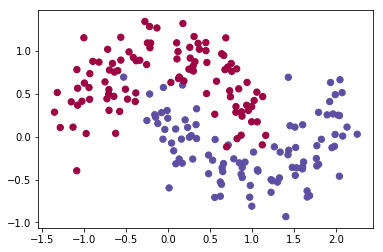

In [2]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [3]:
# one hot encoder
y_oneHotEncoder = np.zeros([len(y),2])

for elementIndex in xrange(len(y)):
    if y[elementIndex]==1:
        y_oneHotEncoder[elementIndex,1] = 1       
    else:
        y_oneHotEncoder[elementIndex,0] = 1 

## Learning Parameters

In [4]:
# Hyper- parameters
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
nn_hdim = 3

# one hot encoder
y_oneHotEncoder = np.zeros([len(y),2])

for elementIndex in xrange(len(y)):
    if y[elementIndex]==1:
        y_oneHotEncoder[elementIndex,1] = 1       
    else:
        y_oneHotEncoder[elementIndex,0] = 1    

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent

# Initialize the parameters to random values. We need to learn these.
np.random.seed(64)
W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
b2 = np.zeros((1, nn_hdim))
W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
b3 = np.zeros((1, nn_output_dim))

# Helper Functions

In [5]:
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [6]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b2, W2, b3 = model['W1'], model['b2'], model['W2'], model['b3']
    # Forward propagation to calculate our predictions
    z2 = X.dot(W1) + b2
    a2 = np.tanh(z2)
    z3 = a2.dot(W2) + b3
    exp_scores = np.exp(z3)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)        
    return 1./num_examples * data_loss

In [7]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b2, W2, b3 = model['W1'], model['b2'], model['W2'], model['b3']
    # Forward propagation
    z2 = x.dot(W1) + b2
    a2 = np.tanh(z2)
    z3 = a2.dot(W2) + b3
    exp_scores = np.exp(z3)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

# Forward Propagation

The forward propagation is simply propagating the input through the weights and the synapses of the layers.

![](https://drive.google.com/uc?id=1713cs-rDjkw9XvMPHMxQOW1nWczUflhN)

## Input layer to the hidden layer: L1 - L2

In [8]:
def tanh(z):
    tanh = np.tanh(z)
    return tanh

In [9]:
def sigma2(z):
    sigma2Out = tanh(z)
    return sigma2Out

In [10]:
z2 = X.dot(W1) + b2
# a2 = tanh(z2)
a2 = sigma2(z2)

## Hidden layer to the output layer: L2 - L3

In [11]:
def softmax(z):
    exp_scores = np.exp(z)
    softmaxOut = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return softmaxOut

In [12]:
def sigma3(z):
    sigma3Out = softmax(z)
    return sigma3Out    

In [13]:
z3 = a2.dot(W2) + b3
#y_hat = softmax(z3)
y_hat = sigma3(z3)

In [14]:
def costFunction(y,y_hat):    
    nll = np.sum(-y*np.log(y_hat))
    return nll

# Back Propagation

The back propagation is simply propagating the output through the weights and identifying the gradient of the cost function w.r.t. to the weight matrices.

## Updating W2

![](https://drive.google.com/uc?id=1zcL-O2Af8p9xJDnJ-ooeDjWtbOeWxhGt)

In [15]:
def softmaxPrime(z):
    softmaxOut = np.multiply(z,(1-z))
    return softmaxOut

In [16]:
def sigma3Prime(z):
    sigma3Out = softmaxPrime(z)
    return sigma3Out

In [17]:
def costFunctionPrime(y,y_hat):    
    costFunctionPrimeOut = -np.divide(y,y_hat)
    return costFunctionPrimeOut

In [18]:
dJdy_hat = costFunctionPrime(y_oneHotEncoder,y_hat)
#dy_hatdz = softmaxPrime(y_hat)
dy_hatdz = sigma3Prime(y_hat)

delta3 = np.zeros(dJdy_hat.shape)
index = 0
for element in np.multiply(dJdy_hat,dy_hatdz):
    if element[0]==0:
        element[0] = -element[1]
    else:
        element[1] = -element[0]    
    delta3[index] = element
    index += 1

dW2 = (a2.T).dot(delta3)
db3 = np.sum(delta3, axis=0, keepdims=True)

## Updating W1

![](https://drive.google.com/uc?id=1SqLuhsTnjpYeIq2ONVSZhk7aAPIjwQU_)

In [19]:
def tanhPrime(z):
    # Note the derivative of tanh(x) is just 1-tanh(x)^2 and since z in this functions is already tanh(x) we can just use 1- z^2
    sigmaPrimeOut = (1 - np.power(z, 2))
    return sigmaPrimeOut    

In [20]:
def sigma2Prime(z):
    sigma2Out = tanhPrime(z)
    return sigma2Out

In [21]:
#delta2 = delta3.dot(W2.T) * (1 - np.power(a2, 2))
delta2 = delta3.dot(W2.T) * sigma2Prime(a2)
dW1 = np.dot(X.T, delta2)
db2 = np.sum(delta2, axis=0)

## Assigning Update

In [22]:
# Gradient descent parameter update
W1 += -epsilon * dW1
b2 += -epsilon * db2
W2 += -epsilon * dW2
b3 += -epsilon * db3

# Assign new parameters to the model
model = { 'W1': W1, 'b2': b2, 'W2': W2, 'b3': b3}

## Calculate Loss 

In [23]:
# Optionally print the loss.
# This is expensive because it uses the whole dataset, so we don't want to do it too often.
print("Loss after iteration %f" %(calculate_loss(model)))

Loss after iteration 0.782589


The back propagation if performed for n number of iterations of the error rate changes only by a little amount.

# Putting Everything Together

## Hyper Parameters

In [24]:
np.random.seed(64)
myModel = {'numberOfInputNodes': nn_input_dim,
    'numberOfHiddenNodes': nn_hdim,
    'numberOfOutputNodes': nn_output_dim,
    'X': X,
    'y': y,
    'epsilon': epsilon,       
    'y_oneHotEncoder': y_oneHotEncoder,
    'W1': np.random.randn(nn_input_dim, nn_hdim),
    'b2': np.zeros((1, nn_hdim)),
    'W2': np.random.randn(nn_hdim, nn_output_dim),
    'b3': np.zeros((1, nn_output_dim))    
    }

## Training

In [25]:
def mybuild_model2(model, num_passes=20000, print_loss=False):
    
    # ----------------------------------------------------------------------
    # Unpack the model hyper-parameters
    # ----------------------------------------------------------------------
    X = model['X']
    y = model['y']
    y_oneHotEncoder = model['y_oneHotEncoder']
    W1 = model['W1']
    b2 = model['b2']
    W2 = model['W2']
    b3 = model['b3']   
    epsilon = model['epsilon']
    
    # ----------------------------------------------------------------------
    # Gradient descent batch 
    # ----------------------------------------------------------------------
    for i in range(0, num_passes):
        
        # ----------------------------------------------------------------------
        # Forward propagation        
        # ----------------------------------------------------------------------
        # ---------------------------------------------
        # Input layer to the hidden layer ----- L1 - L2
        # ---------------------------------------------
        z2 = X.dot(W1) + b2
        a2 = sigma2(z2)
        # ---------------------------------------------
        # Hidden layer to the ouput layer ----- L2 - L3
        # ---------------------------------------------
        z3 = a2.dot(W2) + b3
        y_hat = sigma3(z3)
        
        # ----------------------------------------------------------------------
        # Backpropagation
        # ----------------------------------------------------------------------
        # ---------------------------------------------
        # Update W2 and b3
        # ---------------------------------------------        
        dCdy_hat = costFunctionPrime(y_oneHotEncoder,y_hat)
        dy_hatdz = sigma3Prime(y_hat)
        np.multiply(dCdy_hat,dy_hatdz)
        
        delta3 = np.zeros(dCdy_hat.shape)
        index = 0
        for element in np.multiply(dCdy_hat,dy_hatdz):
            if element[0]==0:
                element[0] = -element[1]
            else:
                element[1] = -element[0]    
            delta3[index] = element
            index += 1

        dW2 = (a2.T).dot(delta3)        
        db3 = np.sum(delta3, axis=0, keepdims=True)
        # ---------------------------------------------
        # Update W1 and b2
        # ---------------------------------------------            
        delta2 = delta3.dot(W2.T) * sigma2Prime(a2)
        dW1 = np.dot(X.T, delta2)
        db2 = np.sum(delta2, axis=0)
        
        # ----------------------------------------------------------------------
        # Gradient descent parameter update
        # ----------------------------------------------------------------------
        W1 += -epsilon * dW1
        b2 += -epsilon * db2
        W2 += -epsilon * dW2
        b3 += -epsilon * db3
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b2': b2, 'W2': W2, 'b3': b3}
        
        # ----------------------------------------------------------------------
        # Calculate loss function
        # ----------------------------------------------------------------------
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

## Testing / Validation

In [26]:
# Build a model with a 3-dimensional hidden layer
model = mybuild_model2(myModel,num_passes=5000,print_loss=True)

Loss after iteration 0: 0.759198
Loss after iteration 1000: 0.065392
Loss after iteration 2000: 0.068691
Loss after iteration 3000: 0.068893
Loss after iteration 4000: 0.069016


## Visualization

Text(0.5,1,'Decision Boundary for hidden layer size 3')

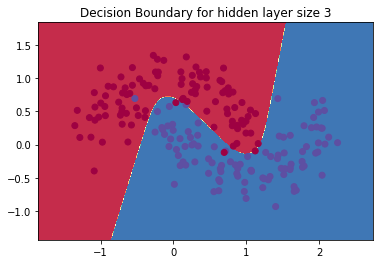

In [27]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")